Abstract:

Aileadtech wants to bring down the cost of retaining employees by limiting incentives to only employees who are at risk of Attrition.

This study aims to use employee characteristics to predict if an employee is at risk of attrition. The data for this study was provided by Aileadtech.The data which is in csv format was loaded into the Jupyter notebook using pandas. The data contains 34 features of each employee and the Attrition target.There are 2940 observations.Importantly the target is unbalanced. From the target, the objective of the study can be achieved using a classification supervision learning algorithm.

The data was first subjected to cleaning techniques such as removal of irrevalant values and duplicates, conversion of data types, check and handling of missing values, and was further explored to gain a deeper understanding of it. The summary characteristics, correlation, features data type backed with relevant visualization are some of the exploratory work done on the data. Also some features were dropped based on their correlation coefficients with similar features. Others were dropped because they have same value for all entries.

The cleaned data went through a preprocessing stage such as data conversion and normalization. The end product is a numerical format that is required by Sklearn algorithms for predictive modeling. Two separate functions were created which returned the variables for modeling, for both the balanced and unbalanced data.

Grid search algorithm which employs cross validation technique was used to evaluate the performance of three supervised classification algorithms(LogisticRegression, DecisionTRee, RandomForest). This exercise was carried out on both the balanced and unbalanced data for the sake of comparing the performace of both data. The unbalanced data performed better for the three algorithms. 

At the modeling stage, the data was divided into train and test dataset.The variables from both the balanced and unbalanced data were use to create different models and their performance accuracies with the test data obtained. A function was created to handle modeling and performance accuracies.

The balanced data performed better with the three algorithms considered at this stage.
Two tables comparing the performace of the three algorithms on both the balanced and unbalanced data were created.

The effect of overfits is drastically reduced but not totally eliminated using the balanced data. Also the recall score also improved with the balanced data.

Conclusion:
Based on the results obtained by applying the three algorithms on the balanced data, DecisionTreeClassifier model performed best and can be deployed by the company to fulfill her goal.



In [1]:
#importing the various modules, classes and functions for data analytic and prediction
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,precision_score,classification_report,recall_score,accuracy_score

# Loading the Attrition data with pandas
path = r'C:\Users\USER\Desktop\Attrition Project\Attrition Project\HR_Employee_Attrition_Dataset.csv'
Attrition_proj_data = pd.read_csv(path)

In [2]:
# To see the initial five observations in the Attrition data
Attrition_proj_data.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# To see the number of columns and rows in the Attrition data
Attrition_proj_data.shape

(2940, 35)

In [4]:
# To see the column names in the Attrition data
Attrition_proj_data.columns

Index(['EmployeeNumber', 'Attrition', 'Age', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
#To see the data type of the columns in the Attrition data
Attrition_proj_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   Age                       2940 non-null   int64 
 3   BusinessTravel            2940 non-null   object
 4   DailyRate                 2940 non-null   int64 
 5   Department                2940 non-null   object
 6   DistanceFromHome          2940 non-null   int64 
 7   Education                 2940 non-null   int64 
 8   EducationField            2940 non-null   object
 9   EmployeeCount             2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

In [6]:
#To see the general statistic of the numerical variables or columns in the Attrition data
Attrition_proj_data.describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,1470.500000,36.923810,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,848.849221,9.133819,403.440447,8.105485,1.023991,0.0,1.092896,20.325969,0.711440,1.106752,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,735.750000,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1470.500000,36.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,2205.250000,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,2940.000000,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
# To see the duplicate rows in the Attrition data
Attrition_proj_data[Attrition_proj_data.duplicated()]

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [8]:
#To see the number of null values in the Attrition data
Attrition_proj_data.isna().sum()

EmployeeNumber              0
Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

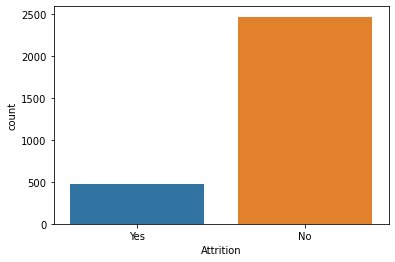

In [3]:
#To see the counts of unigue values in the Attrition variable of the data graphically
sns.countplot(x ='Attrition' , data =Attrition_proj_data)
plt.show()

In [4]:
# a variable that contains the numerical variables in th Attrition data
Attrition_proj_data_num = Attrition_proj_data.select_dtypes(include = np.number)

In [5]:
# The sub data containing the numerical variables in the Attrition data
Attrition_proj_data_num

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1102,1,2,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,2,49,279,8,1,1,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,3,37,1373,2,2,1,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,1392,3,4,1,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,591,2,1,1,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,2936,36,884,23,2,1,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
2936,2937,39,613,6,1,1,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
2937,2938,27,155,4,3,1,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
2938,2939,49,1023,2,3,1,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


In [6]:
# A variable containing the categorical variables in the Attrition data
Attrition_proj_data_cat = Attrition_proj_data.select_dtypes(exclude = np.number)

In [7]:
# To see the categorical variables
Attrition_proj_data_cat

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
2935,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
2936,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
2937,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
2938,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [8]:
# A visual display of  uniques data in a categorical variable
def cat_count_plot(var):
    var = var
    sns.countplot(x = var, data = Attrition_proj_data_cat)
    plt.show()

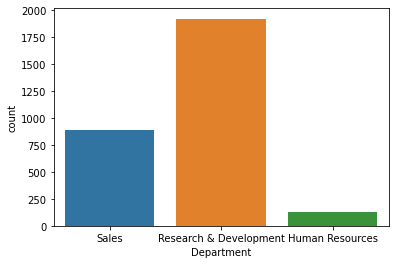

In [9]:
# Application of the function above
cat_count_plot('Department')

In [10]:
# A function for correlation of a given numerical variable with other numerical variables, a boxplot to see outliers in the numerical variable, and its histogram distribution plot
def num_plot(a):
    print(Attrition_proj_data_num.corr()[a])
    sns.boxplot(y = Attrition_proj_data_num[a])
    plt.show()
    sns.histplot(data = Attrition_proj_data_num[a])
    plt.show()

EmployeeNumber             -0.025742
Age                         0.010661
DailyRate                   1.000000
DistanceFromHome           -0.004985
Education                  -0.016806
EmployeeCount                    NaN
EnvironmentSatisfaction     0.018355
HourlyRate                  0.023381
JobInvolvement              0.046135
JobLevel                    0.002966
JobSatisfaction             0.030571
MonthlyIncome               0.007707
MonthlyRate                -0.032182
NumCompaniesWorked          0.038153
PercentSalaryHike           0.022704
PerformanceRating           0.000473
RelationshipSatisfaction    0.007846
StandardHours                    NaN
StockOptionLevel            0.042143
TotalWorkingYears           0.014515
TrainingTimesLastYear       0.002453
WorkLifeBalance            -0.037848
YearsAtCompany             -0.034055
YearsInCurrentRole          0.009932
YearsSinceLastPromotion    -0.033229
YearsWithCurrManager       -0.026363
Name: DailyRate, dtype: float64


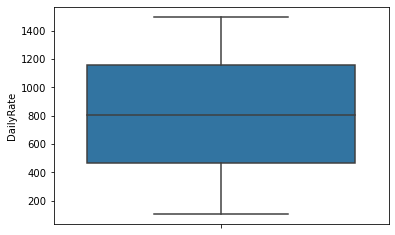

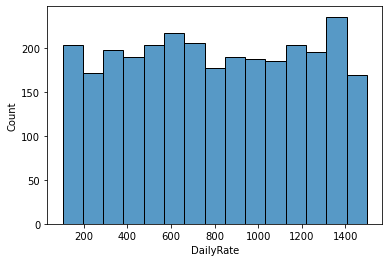

In [11]:
# Application of the function above on a numerical variable
num_plot('DailyRate')

In [12]:
#A function that returns the train and test dataset splitted from the  unbalanced Attrition data
def proces_unbal_data(Attrition_proj_data):
    Attrition_proj_data = Attrition_proj_data
    # dropping some irrelevant variables
    Attrition_proj_data_updated = Attrition_proj_data.drop(['Department','Over18','JobRole','StandardHours','TotalWorkingYears','YearsInCurrentRole','YearsWithCurrManager','EmployeeNumber','EmployeeCount'], axis=1)
    # splitting data into features and target
    features = Attrition_proj_data_updated.drop('Attrition',axis =1)
    target = Attrition_proj_data_updated['Attrition']
    # Converting the categorical variables to numerical variables
    target_unbal = pd.get_dummies(target, drop_first=True).values
    features_unbal = pd.get_dummies(features, columns = ['BusinessTravel','EducationField','Gender','MaritalStatus','OverTime'] ).values
    # Splitting the converted data into train and test dataset
    X_train, X_test, y_train, y_test = train_test_split(features_unbal,target_unbal,random_state = 1)
    return X_train, X_test, y_train, y_test 

In [13]:
# A function that returns the train and test datasets splitted from the balanced Attrition data
def proces_Smote_data(Attrition_proj_data):
    Attrition_proj_data = Attrition_proj_data
    #dropping some irrelevants variables in the Attrition data
    Attrition_proj_data_updated = Attrition_proj_data.drop(['Department','Over18','JobRole','StandardHours','TotalWorkingYears','YearsInCurrentRole','YearsWithCurrManager','EmployeeNumber','EmployeeCount'], axis=1)
    #Splitting the data into features and target
    features = Attrition_proj_data_updated.drop('Attrition',axis =1)
    target = Attrition_proj_data_updated['Attrition']
    #Convertion categorical variables to numerical variables
    target_bal = pd.get_dummies(target, drop_first=True)
    features_bal = pd.get_dummies(features, columns = ['BusinessTravel','EducationField','Gender','MaritalStatus','OverTime'] )
    # Balancing the unbalanced data
    smote = SMOTE(random_state =1)
    features_smote, target_smote = smote.fit_resample(features_bal,target_bal)
    #printing the rows and columns of the balanced data
    print(target_smote.shape,features_smote.shape)
    #Splitting the balanced data into train and test dataset
    X_train, X_test, y_train, y_test = train_test_split(features_smote,target_smote,random_state = 1)
    return X_train, X_test, y_train, y_test

In [14]:
#A function that performs hyperparameter tuning using the the train and test dataset and returns the best parameter and test score
def Emman_gridsearchcv(model,param,X_train, X_test, y_train, y_test,scale=True):
    model = model
    param = param
    X_train = X_train
    X_test = X_test
    y_train = y_train
    y_test = y_test
    scale = scale
    # for algorithm that requires normalization before hyperparameter tuning
    if scale == True:
        scaler = StandardScaler()
        X_train_sc = scaler.fit_transform(X_train)
        X_test_sc = scaler.transform(X_test)
        Gridscv = GridSearchCV(model,param,cv = 5,n_jobs = -1)
        Gridscv.fit(X_train_sc,np.ravel(y_train))
        return {'Best parameter':Gridscv.best_params_ ,'Test Score': Gridscv.score(X_test_sc, y_test)}
    # for algorithm that does not require normalization before hyperparameter tuning
    else:
        Gridscv = GridSearchCV(model,param,cv = 5,n_jobs = -1)
        Gridscv.fit(X_train,np.ravel(y_train))
        return {'Best parameter':Gridscv.best_params_ ,'Test Score': Gridscv.score(X_test, y_test)}

In [19]:
#Gridsearchchcv on the balanced data using logisticRegression Algorithm
X_train_bal, X_test_bal, y_train_bal, y_test_bal = proces_Smote_data(Attrition_proj_data)
Log_model_new = LogisticRegression(random_state = 1)
param_C = { 'C':[0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009, 0.01, 0.1, 1,2,3,4]}
Emman_gridsearchcv(Log_model_new,param_C,X_train_bal, X_test_bal, y_train_bal, y_test_bal,scale=True)

(4932, 1) (4932, 36)


{'Best parameter': {'C': 4}, 'Test Score': 0.8872668288726683}

In [20]:
#Gridsearchchcv on the unbalanced data using logisticRegression Algorithm
X_train, X_test, y_train, y_test = proces_unbal_data(Attrition_proj_data)
Log_model_new = LogisticRegression(random_state = 1)
param_C = { 'C':[0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009, 0.01, 0.1, 1,2,3,4]}
Emman_gridsearchcv(Log_model_new,param_C,X_train, X_test, y_train, y_test,scale=True)

{'Best parameter': {'C': 1}, 'Test Score': 0.8761904761904762}

In [16]:
# A function for modeling and performance analysis. It prints and returns performance values
def model_perf(model,X_train, X_test, y_train, y_test,scale=True):
    model = model
    X_train = X_train
    X_test = X_test
    y_train = y_train
    y_test = y_test
    scale = scale
    # For algorithm that requires normalization of data before using for modeling
    if scale == True:
        scaler = StandardScaler()
        X_train_sc = scaler.fit_transform(X_train)
        X_test_sc = scaler.transform(X_test)
        model.fit(X_train_sc,np.ravel(y_train))
        # Display of the performance of the model on the train and test dataset
        print(' The score of the model with the train data is {:.4f}'.format(model.score(X_train_sc,y_train)))
        print(' The score of the model with the test data is {:.4f}'.format(model.score(X_test_sc,y_test)))
        # perdiction using the model created
        y_pred = model.predict(X_test_sc)
        # displaying and returning the the accuracies of the predicted variable and the actual variable 
        print('The Confusion Matrix Below:')
        print(confusion_matrix(y_test,y_pred))
        print('The classification_report:')
        print(classification_report(y_test,y_pred))
        performance = {'Accuracy_Score': accuracy_score(y_test,y_pred),'precision_score': precision_score(y_test,y_pred),'recall_score': recall_score(y_test,y_pred) }
    # For algorithm that requires normalization of data before using for modeling    
    else:
        model.fit(X_train,np.ravel(y_train))
        # Display of the performance of the model on the train and test dataset
        print(' The score of the model with the train data is {:.4f}'.format(model.score(X_train,y_train)))
        print(' The score of the model with the test data is {:.4f}'.format(model.score(X_test,y_test)))
        # perdiction using the model created
        y_pred = model.predict(X_test)
        # displaying and returning the the accuracies of the predicted variable and the actual variable
        print('The Confusion Matrix Below:')
        print(confusion_matrix(y_test,y_pred))
        print('The classification_report:')
        print(classification_report(y_test,y_pred))
        performance = {'Accuracy_Score': accuracy_score(y_test,y_pred),'precision_score': precision_score(y_test,y_pred),'recall_score': recall_score(y_test,y_pred) }
    
    return performance

In [17]:
#Modeling and performance analysis of model on the balanced data using the best parameter on the LogisticRegression algorithm
model = LogisticRegression(C = 4)
model_perf(model,X_train_bal, X_test_bal, y_train_bal, y_test_bal,scale=True)

 The score of the model with the train data is 0.8886
 The score of the model with the test data is 0.8873
The Confusion Matrix Below:
[[596  26]
 [113 498]]
The classification_report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       622
           1       0.95      0.82      0.88       611

    accuracy                           0.89      1233
   macro avg       0.90      0.89      0.89      1233
weighted avg       0.90      0.89      0.89      1233



{'Accuracy_Score': 0.8872668288726683,
 'precision_score': 0.950381679389313,
 'recall_score': 0.8150572831423896}

In [21]:
#Modeling and performance analysis of model on the unbalanced data using the best parameter on the LogisticRegression algorithm
model = LogisticRegression( C = 1)
model_perf(model,X_train, X_test, y_train, y_test,scale=True)

 The score of the model with the train data is 0.8862
 The score of the model with the test data is 0.8762
The Confusion Matrix Below:
[[593  15]
 [ 76  51]]
The classification_report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       608
           1       0.77      0.40      0.53       127

    accuracy                           0.88       735
   macro avg       0.83      0.69      0.73       735
weighted avg       0.87      0.88      0.86       735



{'Accuracy_Score': 0.8761904761904762,
 'precision_score': 0.7727272727272727,
 'recall_score': 0.4015748031496063}

In [22]:
#Gridsearchchcv on the balanced data using RandomForest Algorithm
X_train_bal, X_test_bal, y_train_bal, y_test_bal = proces_Smote_data(Attrition_proj_data)
param_ran = { 'n_estimators':[100,150,200,250,300],'max_depth':[3,4,5,6,7]}
ran = RandomForestClassifier(random_state = 1)
Emman_gridsearchcv(ran,param_ran,X_train_bal, X_test_bal, y_train_bal, y_test_bal,scale=False)

(4932, 1) (4932, 36)


{'Best parameter': {'max_depth': 7, 'n_estimators': 150},
 'Test Score': 0.9464720194647201}

In [23]:
#Gridsearchcv on the unbalanced data using RandomForest Algorithm
X_train, X_test, y_train, y_test = proces_unbal_data(Attrition_proj_data)
ran = RandomForestClassifier(random_state = 1)
param_ran = { 'n_estimators':[100,150,200,250,300],'max_depth':[3,4,5,6,7]}
Emman_gridsearchcv(ran,param_ran,X_train, X_test, y_train, y_test,scale=False)

{'Best parameter': {'max_depth': 7, 'n_estimators': 150},
 'Test Score': 0.8748299319727891}

In [24]:
#Modeling and performance analysis of model on the balanced data using the best parameters on the RandomForest algorithm
model= RandomForestClassifier(random_state = 1,n_estimators=150,max_depth = 7,n_jobs=-1)
model_perf(model,X_train_bal, X_test_bal, y_train_bal, y_test_bal,scale=False)

 The score of the model with the train data is 0.9613
 The score of the model with the test data is 0.9465
The Confusion Matrix Below:
[[610  12]
 [ 54 557]]
The classification_report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       622
           1       0.98      0.91      0.94       611

    accuracy                           0.95      1233
   macro avg       0.95      0.95      0.95      1233
weighted avg       0.95      0.95      0.95      1233



{'Accuracy_Score': 0.9464720194647201,
 'precision_score': 0.9789103690685413,
 'recall_score': 0.911620294599018}

In [25]:
#Modeling and performance analysis of model on the unbalanced data using the best parameters on the RandomForest algorithm
model= RandomForestClassifier(random_state = 1,n_estimators=150,max_depth = 7,n_jobs=-1)
model_perf(model,X_train, X_test, y_train, y_test,scale=False)

 The score of the model with the train data is 0.9265
 The score of the model with the test data is 0.8748
The Confusion Matrix Below:
[[604   4]
 [ 88  39]]
The classification_report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       608
           1       0.91      0.31      0.46       127

    accuracy                           0.87       735
   macro avg       0.89      0.65      0.69       735
weighted avg       0.88      0.87      0.85       735



{'Accuracy_Score': 0.8748299319727891,
 'precision_score': 0.9069767441860465,
 'recall_score': 0.30708661417322836}

In [47]:
#Gridsearchchcv on the balanced data using DecisionTreeClassifier Algorithm
X_train_bal, X_test_bal, y_train_bal, y_test_bal = proces_Smote_data(Attrition_proj_data)
param_dis = { 'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5,6,7,8,9,10]}
dis = DecisionTreeClassifier(random_state = 1)
Emman_gridsearchcv(dis,param_dis,X_train_bal, X_test_bal, y_train_bal, y_test_bal,scale=False)

(4932, 1) (4932, 36)


{'Best parameter': {'criterion': 'gini', 'max_depth': 10},
 'Test Score': 0.9424168694241687}

In [48]:
#Gridsearchchcv on the unbalanced data using DecisionTreeClassifier Algorithm
X_train, X_test, y_train, y_test = proces_unbal_data(Attrition_proj_data)
dis = DecisionTreeClassifier(random_state = 1)
param_dis = {'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5,6,7,8,9,10] }
Emman_gridsearchcv(dis,param_dis,X_train, X_test, y_train, y_test,scale=False)

{'Best parameter': {'criterion': 'entropy', 'max_depth': 10},
 'Test Score': 0.9142857142857143}

In [49]:
#Modeling and performance analysis of model on the balanced data using the best parameters on the DecisionTeeClassifier algorithm
model= DecisionTreeClassifier(random_state = 1,criterion='gini',max_depth = 10)
model_perf(model,X_train_bal, X_test_bal, y_train_bal, y_test_bal,scale=False)

 The score of the model with the train data is 0.9695
 The score of the model with the test data is 0.9424
The Confusion Matrix Below:
[[570  52]
 [ 19 592]]
The classification_report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       622
           1       0.92      0.97      0.94       611

    accuracy                           0.94      1233
   macro avg       0.94      0.94      0.94      1233
weighted avg       0.94      0.94      0.94      1233



{'Accuracy_Score': 0.9424168694241687,
 'precision_score': 0.9192546583850931,
 'recall_score': 0.9689034369885434}

In [50]:
#Modeling and performance analysis of model on the unbalanced data using the best parameters on the DecisionTeeClassifier algorithm
model= DecisionTreeClassifier(random_state = 1,criterion='entropy',max_depth = 10)
model_perf(model,X_train, X_test, y_train, y_test,scale=False)

 The score of the model with the train data is 0.9823
 The score of the model with the test data is 0.9143
The Confusion Matrix Below:
[[592  16]
 [ 47  80]]
The classification_report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       608
           1       0.83      0.63      0.72       127

    accuracy                           0.91       735
   macro avg       0.88      0.80      0.83       735
weighted avg       0.91      0.91      0.91       735



{'Accuracy_Score': 0.9142857142857143,
 'precision_score': 0.8333333333333334,
 'recall_score': 0.6299212598425197}

In [4]:
# Performance table from the balanced data on various algorithms
Perf_table_bal_data = pd.DataFrame({'Accuracy_Score':[0.887,0.946,0.942],'precision_score':[0.950,0.978,0.919],'recall_score':[0.815,0.911,0.968] },index=['LogisticRegression','RandomForest','DecisionTreeClassifier'])

In [5]:
Perf_table_bal_data

,Accuracy_Score,precision_score,recall_score
LogisticRegression,0.887,0.950,0.815
RandomForest,0.946,0.978,0.911
DecisionTreeClassifier,0.942,0.919,0.968


In [7]:
# Performance table from the unbalanced data on various algorithms
Perf_table_unbal_data = pd.DataFrame({'Accuracy_Score':[0.876,0.874,0.914],'precision_score':[0.772,0.906,0.833],'recall_score':[0.401,0.307,0.630] },index=['LogisticRegression','RandomForest','DecisionTreeClassifier'])

In [8]:
Perf_table_unbal_data

,Accuracy_Score,precision_score,recall_score
LogisticRegression,0.876,0.772,0.401
RandomForest,0.874,0.906,0.307
DecisionTreeClassifier,0.914,0.833,0.630
